In [10]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.utils import resample
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV

import math 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from sklearn.utils import class_weight

%matplotlib inline 
sns.set(color_codes=True)

In [11]:
def binary(df, min):
  for i in min: 
    df.loc[df.REASON == i, 'REASON'] = 0
  df.loc[df.REASON != 0, 'REASON'] = 1
  return df

In [12]:
data = pd.read_csv('training_data1.csv')

In [13]:
data = data[data.REASON != 7]
data = data.loc[:, data.columns != 'CASEID']
data= data.loc[:, data.columns != 'Unnamed: 0']
data= data.loc[:, data.columns != 'ADMYR']

In [14]:
nd = data.copy(deep=True)

In [15]:
binary(nd,[6])

,ALCFLG,COKEFLG,MARFLG,HERFLG,METHFLG,OPSYNFLG,PCPFLG,HALLFLG,MTHAMFLG,AMPHFLG,...,FREQ_ATND_SELF_HELP_-9,FREQ_ATND_SELF_HELP_1,FREQ_ATND_SELF_HELP_2,FREQ_ATND_SELF_HELP_3,FREQ_ATND_SELF_HELP_4,FREQ_ATND_SELF_HELP_5,IDU_-9,IDU_0,IDU_1,REASON
0,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,1,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377797,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
1377798,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1377799,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1377800,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1


In [16]:
train, test = train_test_split(nd, test_size=0.2, shuffle=True)

train['REASON'].value_counts()

1    1055364
0       2229
Name: REASON, dtype: int64

In [17]:
df_majority = train[train.REASON==1]
df_minority = train[train.REASON==0]
 
# Upsample minority class
df_maj_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=5000,    # to match majority class
                                 random_state=123) # reproducible results
# Upsample minority class
df_min_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5000,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_resampled = pd.concat([df_min_upsampled, df_maj_downsampled])
 
# Display new class counts
df_resampled.REASON.value_counts()

0    5000
1    5000
Name: REASON, dtype: int64

In [18]:
# Labels are the values we want to predict
y_train_nd = np.array(df_resampled['REASON'])
# Remove the labels from the features
# axis 1 refers to the columns
X_train_nd = df_resampled.drop('REASON', axis = 1)
# Saving feature names for later use
feature_list_train_nd = list(X_train_nd.columns)
# Convert to numpy array
X_train_nd = np.array(X_train_nd)

In [19]:
# Labels are the values we want to predict
y_test_nd = np.array(test['REASON'])
# Remove the labels from the features
# axis 1 refers to the columns
X_test_nd = test.drop('REASON', axis = 1)
# Saving feature names for later use
feature_list_train_nd = list(X_test_nd.columns)
# Convert to numpy array
X_test_nd = np.array(X_test_nd)

In [20]:
rf =  RandomForestClassifier()

In [21]:
rf.fit(X_train_nd, y_train_nd);

In [22]:
y_pred_nd=rf.predict(X_test_nd)

print("Accuracy:", metrics.accuracy_score(y_test_nd, y_pred_nd))

Accuracy: 0.932666159856883


[[    44    576]
 [ 17227 246552]]


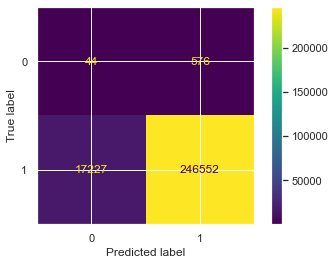

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test_nd, y_pred_nd)
disc = ConfusionMatrixDisplay(cm)
disc.plot()
print(cm)

In [24]:
# Labels are the values we want to predict
labels = np.array(data['REASON'])
# Remove the labels from the features
# axis 1 refers to the columns
features= data.drop('REASON', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

print(feature_list)

['ALCFLG', 'COKEFLG', 'MARFLG', 'HERFLG', 'METHFLG', 'OPSYNFLG', 'PCPFLG', 'HALLFLG', 'MTHAMFLG', 'AMPHFLG', 'STIMFLG', 'BENZFLG', 'TRNQFLG', 'BARBFLG', 'SEDHPFLG', 'INHFLG', 'OTCFLG', 'OTHERFLG', 'EDUC_-9', 'EDUC_1', 'EDUC_2', 'EDUC_3', 'EDUC_4', 'EDUC_5', 'MARSTAT_-9', 'MARSTAT_1', 'MARSTAT_2', 'MARSTAT_3', 'MARSTAT_4', 'NOPRIOR_-9', 'NOPRIOR_0', 'NOPRIOR_1', 'NOPRIOR_2', 'NOPRIOR_3', 'NOPRIOR_4', 'NOPRIOR_5', 'PSOURCE_-9', 'PSOURCE_1', 'PSOURCE_2', 'PSOURCE_3', 'PSOURCE_4', 'PSOURCE_5', 'PSOURCE_6', 'PSOURCE_7', 'ARRESTS_-9', 'ARRESTS_0', 'ARRESTS_1', 'ARRESTS_2', 'EMPLOY_-9', 'EMPLOY_1', 'EMPLOY_2', 'EMPLOY_3', 'EMPLOY_4', 'PSYPROB_-9', 'PSYPROB_1', 'PSYPROB_2', 'PREG_-9', 'PREG_1', 'PREG_2', 'GENDER_-9', 'GENDER_1', 'GENDER_2', 'VET_-9', 'VET_1', 'VET_2', 'DSMCRIT_-9', 'DSMCRIT_1', 'DSMCRIT_2', 'DSMCRIT_3', 'DSMCRIT_4', 'DSMCRIT_5', 'DSMCRIT_6', 'DSMCRIT_7', 'DSMCRIT_8', 'DSMCRIT_9', 'DSMCRIT_10', 'DSMCRIT_11', 'DSMCRIT_12', 'DSMCRIT_13', 'DSMCRIT_14', 'DSMCRIT_15', 'DSMCRIT_16', 

[127  12 100 128  81  59  83  13 125 131 122  79  82 129  15 130  98 119
  80 121  40 106  16 124  14  10   4  66 132  41  85   7 103 113   6 159
  78 114 170  68 126 138  57  77 162  76 133  47   9 139 163  96  97 105
  86 158  63 143  99 109 107  75  67  36 157  17 112  74  44  18 152  87
 110  71 116 154 167  73 108 123  72  48 120  34  27 117 169 104 144  23
  46  62  19 137 166 161  29 115  11  84 168 118  24  39  33 172  50 135
  53 136  64 171 160 164  38 134   8  88  45 150  93 149   5 148  26  56
  58  94   3  69 155  70  22  95 153  28 111 156  92  32  42  35  60  61
   0 145  65 151  31  49 101 147  43  91  20  90  30  89 140  54 146 141
   2  25 142 165  55   1  51  21  52  37 102]


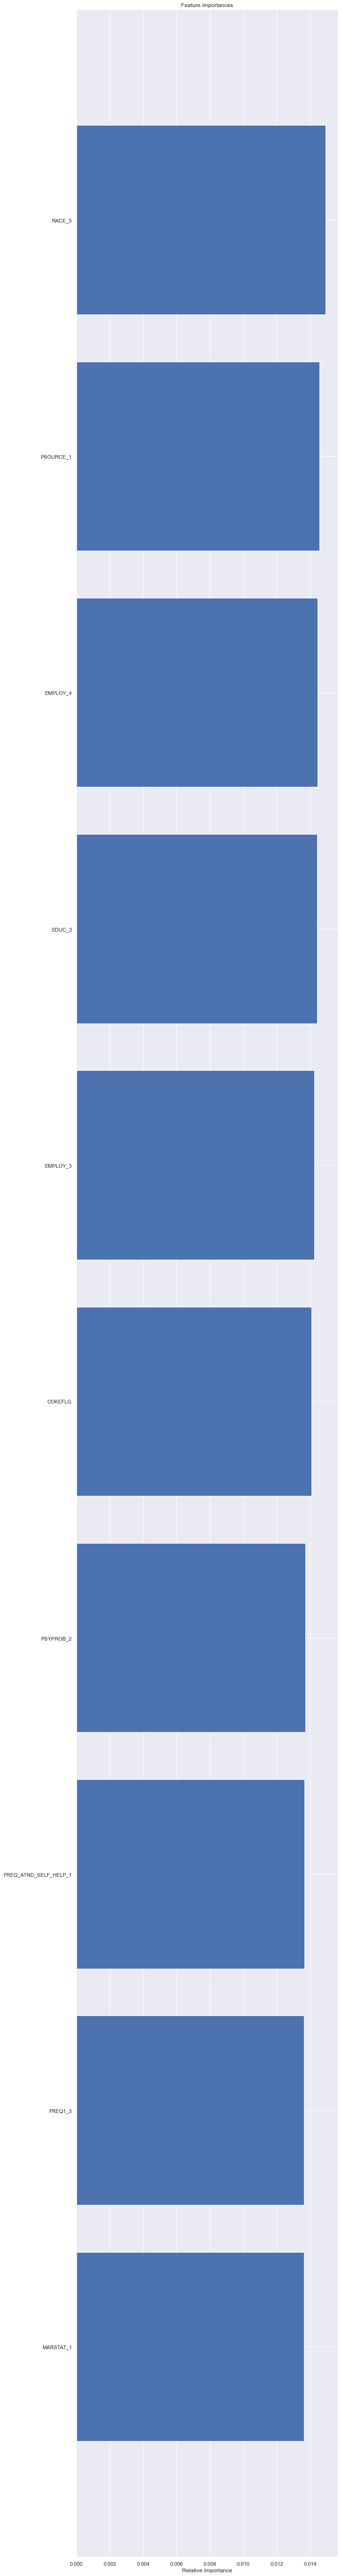

In [25]:
import pandas as pd

ndd = nd.loc[:, nd.columns != 'REASON']


features = ndd.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
print(indices)

# customized number 
num_features = 10 

plt.figure(figsize=(10,100))
plt.title('Feature Importances')

# only plot the customized number of features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [26]:
#model for treatment effective/not effective
data_eff =  data[data['REASON'].isin([1,2])] 
data_eff['REASON'].value_counts()

1    580244
2    346256
Name: REASON, dtype: int64

In [27]:
train_eff, test_eff = train_test_split(data_eff, test_size=0.2, shuffle=True)

train_eff['REASON'].value_counts()

1    464517
2    276683
Name: REASON, dtype: int64

In [28]:
df_majority = train_eff[train_eff.REASON==1]
df_minority = train_eff[train_eff.REASON==2]
 
# Upsample minority class
df_min_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=115835,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_resampled_eff = pd.concat([df_min_upsampled, df_majority])
 
# Display new class counts
df_resampled_eff.REASON.value_counts()

1    464517
2    115835
Name: REASON, dtype: int64

In [29]:
# Labels are the values we want to predict
y_train_eff = np.array(df_resampled_eff['REASON'])
# Remove the labels from the features
# axis 1 refers to the columns
X_train_eff = df_resampled_eff.drop('REASON', axis = 1)
# Saving feature names for later use
feature_list_train_eff = list(X_train_eff.columns)
# Convert to numpy array
X_train_eff = np.array(X_train_eff)

In [30]:
# Labels are the values we want to predict
y_test_eff = np.array(test_eff['REASON'])
# Remove the labels from the features
# axis 1 refers to the columns
X_test_eff = test_eff.drop('REASON', axis = 1)
# Saving feature names for later use
feature_list_train_eff = list(X_test_eff.columns)
# Convert to numpy array
X_test_eff = np.array(X_test_eff)

In [ ]:
model_res = rf.fit(X_train_eff, y_train_eff)

In [ ]:
y_pred_eff = model_res.predict(X_test_eff)


print("Accuracy:", metrics.accuracy_score(y_test_eff, y_pred_eff))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test_eff, y_pred_eff)
disc = ConfusionMatrixDisplay(cm)
disc.plot()
print(cm)